## Importing dependencies and creating initial data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Finding and removing repeat values

In [2]:
mouse_df['Mouse ID'].value_counts()

mouse_df.loc[mouse_df['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
mouse_cleaned = mouse_df.loc[mouse_df['Mouse ID'] != 'g989', :]

## Creating summary table by drug treatment

In [4]:
drug_group = mouse_cleaned.groupby('Drug Regimen')
tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_variance = drug_group['Tumor Volume (mm3)'].var()
tumor_std = drug_group['Tumor Volume (mm3)'].std()

tumor_sample = mouse_cleaned.sample(25)
tumor_sample_group = tumor_sample.groupby('Drug Regimen')
tumor_sem = st.sem(tumor_sample['Tumor Volume (mm3)'])

drug_summary_table = pd.DataFrame(
{'Mean': tumor_mean, 
 'Median': tumor_median, 
 'Variance': tumor_variance, 
 'Standard Deviation': tumor_std, 
 'Standard Error': tumor_sem})

drug_summary_table.index.name = None
drug_summary_table.sort_values(by=['Variance'])

,Mean,Median,Variance,Standard Deviation,Standard Error
Ramicane,40.216745,40.673236,23.486704,4.846308,2.509582
Capomulin,40.675741,41.557809,24.947764,4.994774,2.509582
Ceftamin,52.591172,51.776157,39.290177,6.268188,2.509582
Infubinol,52.884795,51.820584,43.128684,6.567243,2.509582
Propriva,52.320930,50.446266,43.852013,6.622085,2.509582
Zoniferol,53.236507,51.818479,48.533355,6.966589,2.509582
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.509582
Placebo,54.033581,52.288934,61.168083,7.821003,2.509582
Naftisol,54.331565,52.509285,66.173479,8.134708,2.509582
Ketapril,55.235638,53.698743,68.553577,8.279709,2.509582


## Creating bar charts (by drug treatment)

In [5]:
drug_counts = drug_group['Mouse ID'].count()
drug_counts

Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

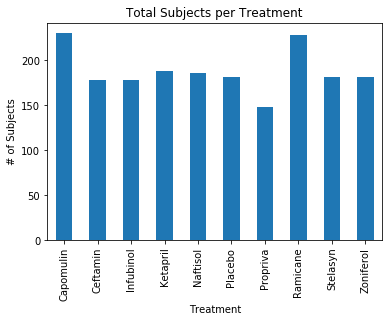

In [6]:
drug_counts.plot(kind="bar")
plt.xlabel('Treatment')
plt.ylabel('# of Subjects')
plt.title('Total Subjects per Treatment')
plt.show()

In [7]:
x_index = drug_counts.index
x_axis = [x for x in x_index]

y_axis = [x for x in drug_counts]

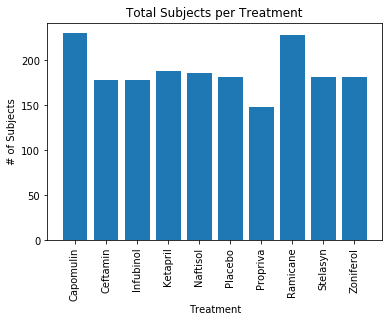

In [8]:
plt.bar(x_axis, y_axis)
plt.xlabel('Treatment')
plt.ylabel('# of Subjects')
plt.title('Total Subjects per Treatment')
plt.xticks(rotation=90)
plt.show()

## Creating pie charts (by sex)

In [9]:
sex_group = mouse_cleaned.groupby('Sex')
sex_counts = sex_group['Mouse ID'].count()

In [10]:
labels = [x for x in sex_counts.index]
pie_values = [x for x in sex_counts]

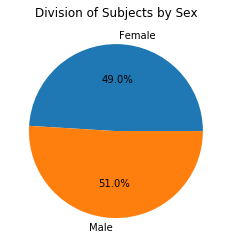

In [11]:
sex_counts.plot.pie(autopct='%1.1f%%')
plt.title('Division of Subjects by Sex')
plt.ylabel('')
plt.show()

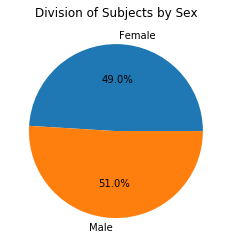

In [12]:
plt.pie(pie_values, labels=labels, autopct="%1.1f%%")
plt.title('Division of Subjects by Sex')
plt.show()

## Calculating tumor volume across most promising treatments

In [44]:
drug_mouse_group = mouse_cleaned.groupby(['Drug Regimen', 'Mouse ID'])
drug_mouse_group
tumor_mass = pd.DataFrame(drug_mouse_group['Tumor Volume (mm3)'].sum())
tumor_mass
promising_tumor_mass = tumor_mass.loc[
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
promising_tumor_mass

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128              419.636356
             b742              400.836993
             f966              182.529864
             g288              419.900966
             g316              446.133439
...                                   ...
Ramicane     s508              360.501562
             u196              455.763948
             w678               88.166373
             y449              181.439088
             z578              384.115100

[100 rows x 1 columns]

In [70]:
quartiles = promising_tumor_mass.quantile([.25,.5,.75])
lq = quartiles.loc[.25]
uq = quartiles.loc[.75]
iqr = uq - lq

lb = lq-(1.5*iqr)
ub = uq+(1.5*iqr)

print(lb, ub)

Tumor Volume (mm3)    175.025813
dtype: float64 Tumor Volume (mm3)    614.959808
dtype: float64
